# Programming Exercise 3:
## Multi-class Classification & Neural Networks

In [1]:
% /Users/Evan/Documents/Fall_2018/Machine Learning - Coursera - Stanford/Week 4/Assignment 3/machine-learning-ex3/ex3
pwd
ls

ans = /Users/Evan/Documents/Fall_2018/Machine Learning - Coursera - Stanford/Week 4/Assignment 3/machine-learning-ex3/ex3
Untitled.ipynb		ex3weights.mat		oneVsAll.m
displayData.m		fmincg.m		predict.m
ex3.m			lib			predictOneVsAll.m
ex3_nn.m		lrCostFunction.m	sigmoid.m
ex3data1.mat		octave-workspace	submit.m


## Part 1: One vs All

In [2]:
system('cat ex3.m')

%% Machine Learning Online Class - Exercise 3 | Part 1: One-vs-all

%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  linear exercise. You will need to complete the following functions
%  in this exericse:
%
%     lrCostFunction.m (logistic regression cost function)
%     oneVsAll.m
%     predictOneVsAll.m
%     predict.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

%% Setup the parameters you will use for this part of the exercise
input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten dig

Loading and Visualizing Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Testing lrCostFunction() with regularization
Cost: 1.034819

Cost: 1.034819

Cost: 1.934819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Program paused. Press enter to continue.


Paused, enter any value to continue 



Training One-vs-All Logistic Regression...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Training Set Accuracy: 0.000000


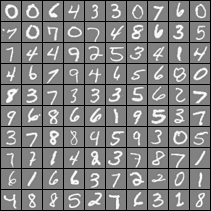

In [3]:
source('ex3.m')

In [4]:
ones(9,1)

ans =

   1
   1
   1
   1
   1
   1
   1
   1
   1



In [4]:
function [J, grad] = lrCostFunction(theta, X, y, lambda)

% Initialize some useful values
m = length(y); % number of training examples

% You need to return the following variables correctly 
J = 0;
grad = zeros(size(theta));

temp = theta;
h_theta = sigmoid(X * theta);
bias_term = (lambda/(2*m))*sum((theta.^2)(2:end));

% J = (1/m)*sum(((-y).*log(htheta)) - ((ones(size(y))-y).*log(1-htheta)));
J=(1/m)*(-y'*log(h_theta)-(1-y)'*log(1-h_theta))+bias_term;

% theta
% theta(2:end)


bias_grad = (lambda/m)*theta;

% bg_size = size(bias_grad)

% X
% X(2:end, :)
% y(2:end)

% y(2:end).*X(2:end, :) + bias_grad



% grad = (1/m)*sum((h_theta-y).*X)'
% same as
grad = (1/m)*((h_theta-y)'*X)';


grad(2:end) = grad(2:end) + bias_grad(2:end);

% grad_2 = size

endfunction



theta_t = [-2; -1; 1; 2];
X_t = [ones(5,1) reshape(1:15,5,3)/10];
y_t = ([1;0;1;0;1] >= 0.5);
lambda_t = 3;
[J grad] = lrCostFunction(theta_t, X_t, y_t, lambda_t);

display(J)
display(grad)

J =  2.5348
grad =

   0.14656
  -0.54856
   0.72472
   1.39800



In [6]:
bias_term = (lambda/(2*m))*sum((theta_t.^2)(2:end))

bias_term =  0.000060000


Loading and Visualizing Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Testing lrCostFunction() with regularization
Cost: 2.534819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Program paused. Press enter to continue.


Paused, enter any value to continue 



Training One-vs-All Logistic Regression...
Iteration    50 | Cost: 1.372016e-02
Iteration    50 | Cost: 5.725249e-02
Iteration    50 | Cost: 6.350204e-02
Iteration    50 | Cost: 3.874318e-02
Iteration    50 | Cost: 6.183714e-02
Iteration    50 | Cost: 2.153728e-02
Iteration    50 | Cost: 3.427326e-02
Iteration    50 | Cost: 8.504307e-02
Iteration    50 | Cost: 7.990373e-02
Iteration    50 | Cost: 1.002263e-02
Program paused. Press enter to continue.


Paused, enter any value to continue 



Training Set Accuracy: 95.120000


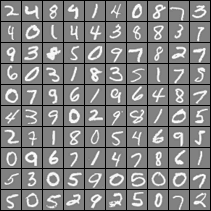

In [39]:
source('ex3.m')

In [3]:
function [all_theta] = oneVsAll(X, y, num_labels, lambda)    
    
    % Some useful variables
    m = size(X, 1);
    n = size(X, 2);

    % You need to return the following variables correctly 
    all_theta = zeros(num_labels, n + 1);

    % Add ones to the X data matrix
    X = [ones(m, 1) X];
        
    % Set Initial theta
    initial_theta = zeros(n + 1, 1);
    
    % Set options for fminunc
    options = optimset('GradObj', 'on', 'MaxIter', 50);

    % Run fmincg to obtain the optimal theta
    % This function will return theta and the cost 
    
    for c = 1:num_labels
         
        all_theta(c,:) = ...
        fmincg (@(t)(lrCostFunction(t, X, (y == c), lambda)), ...
                initial_theta, options);
    end
                
endfunction


input_layer_size  = 400;  % 20x20 Input Images of Digits
num_labels = 10;          % 10 labels, from 1 to 10
                          % (note that we have mapped "0" to label 10)

%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset.
%  You will be working with a dataset that contains handwritten digits.
%

% Load Training Data
% fprintf('Loading and Visualizing Data ...\n')

load('ex3data1.mat'); % training data stored in arrays X, y
m = size(X, 1);

% Randomly select 100 data points to display
rand_indices = randperm(m);
sel = X(rand_indices(1:100), :);


lambda = 0.1;


[all_theta] = oneVsAll(X, y, num_labels, lambda);

% display(all_theta)


error: fmincg: operator *: nonconformant arguments (op1 is 1x400, op2 is 401x1)
error: called from
    fmincg at line 109 column 9
    oneVsAll at line 24 column 24


In [9]:
help max

'max' is a built-in function from the file libinterp/corefcn/max.cc

 -- max (X)
 -- max (X, [], DIM)
 -- [W, IW] = max (X)
 -- max (X, Y)
     Find maximum values in the array X.

     For a vector argument, return the maximum value.  For a matrix
     argument, return a row vector with the maximum value of each
     column.  For a multi-dimensional array, 'max' operates along the
     first non-singleton dimension.

     If the optional third argument DIM is present then operate along
     this dimension.  In this case the second argument is ignored and
     should be set to the empty matrix.

     For two matrices (or a matrix and a scalar), return the pairwise
     maximum.

     Thus,

          max (max (X))

     returns the largest element of the 2-D matrix X, and

          max (2:5, pi)
              =>  3.1416  3.1416  4.0000  5.0000

     compares each element of the range '2:5' with 'pi', and returns a
     row vector of the maximum values.

     For complex arguments, the

In [10]:
whos

Variables in the current scope:

   Attr Name                  Size                     Bytes  Class
   ==== ====                  ====                     =====  ===== 
        J                     1x1                          8  double
        X                  5000x400                 16000000  double
        X_t                   5x4                        160  double
        all_theta            10x401                    32080  double
        ans                   1x1                          8  double
        grad                  4x1                         32  double
        input_layer_size      1x1                          8  double
        lambda                1x1                          8  double
        lambda_t              1x1                          8  double
        m                     1x1                          8  double
        num_labels            1x1                          8  double
        pred               5000x1                      40000  double
  

In [37]:
X_initial = [ones(m,1) X];
size(X_initial')


size(X_initial * all_theta')

% Take row max
[prob p] = max(X_initial * all_theta', [], 2);

size(p)

p(1000:1010,:)

ans =

    401   5000

ans =

   5000     10

ans =

   5000      1

ans =

   1
   2
   2
   2
   2
   2
   2
   2
   2
   2
   2



In [ ]:
ex3_nn


Loading and Visualizing Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Loading Saved Neural Network Parameters ...

Training Set Accuracy: 97.520000
Program paused. Press enter to continue.


Paused, enter any value to continue 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 2 (digit 2)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 9 (digit 9)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 6 (digit 6)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 4 (digit 4)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 1 (digit 1)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 5 (digit 5)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 2 (digit 2)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 1 (digit 1)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 4 (digit 4)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 5 (digit 5)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 6 (digit 6)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 10 (digit 0)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 5 (digit 5)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 3 (digit 3)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 7 (digit 7)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 3 (digit 3)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 9 (digit 9)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 8 (digit 8)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 10 (digit 0)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 2 (digit 2)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 9 (digit 9)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 9 (digit 9)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 6 (digit 6)


Paused - press enter to continue, q to exit: 



Displaying Example Image

Neural Network Prediction: 10 (digit 0)


Loading and Visualizing Data ...
Program paused. Press enter to continue.


Paused, enter any value to continue 



Testing lrCostFunction() with regularization
Cost: 1.034819

Cost: 1.034819

Cost: 1.934819
Expected cost: 2.534819
Gradients:
 0.146561 
 -0.548558 
 0.724722 
 1.398003 
Expected gradients:
 0.146561
 -0.548558
 0.724722
 1.398003
Program paused. Press enter to continue.


Paused, enter any value to continue 



Training One-vs-All Logistic Regression...
error: fmincg: operator *: nonconformant arguments (op1 is 1x400, op2 is 401x1)
error: called from
    fmincg at line 109 column 9
    oneVsAll at line 31 column 24
    ex3 at line 77 column 12


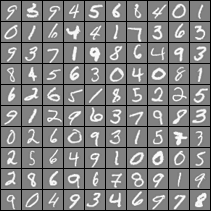

In [1]:
source('ex3.m')

In [14]:
% Unrolling matrices into a single vector
Theta1 = ones(5,3) * 1
Theta2 = ones(4,6) * 2

ThetaAll = [Theta1(:); Theta2(:)];

Theta2 = reshape(ThetaAll(16:39), 4,6)

Theta1 =

   1   1   1
   1   1   1
   1   1   1
   1   1   1
   1   1   1

Theta2 =

   2   2   2   2   2   2
   2   2   2   2   2   2
   2   2   2   2   2   2
   2   2   2   2   2   2

Theta2 =

   2   2   2   2   2   2
   2   2   2   2   2   2
   2   2   2   2   2   2
   2   2   2   2   2   2



In [22]:
function J = CostFunc(theta)

    J = 3*(theta^3) + 2

endfunction

function grad = ApproxGradient(theta, epsilon)

    grad = (CostFunc(theta+epsilon)-CostFunc(theta-epsilon))/(2*epsilon);
    
endfunction

ApproxGrad = ApproxGradient(1, 0.01)


J =  5.0909
J =  4.9109
ApproxGrad =  9.0003


In [26]:
z = 2

g = 1/(1+e^(-z))

g = (1+e^(-z))^(-1)

g = (1+exp(-z))^(-1)

z =  2
g =  0.88080
g =  0.88080
g =  0.88080
